# Initial Analysis of RF Drought Results

In [27]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
datadir = '/g/data/w97/mg5624/RF_project/'
plotdir = '/g/data/w97/mg5624/plots/RF_project/results_analysis/'
scratch = '/scratch/w97/mg5624/plots/RF_project/results_analysis/'

# Load in datasets
drought_ds_1980 = xr.open_dataset(datadir + '/drought_prediction/1980_model/drought_prediction_dataset_1980_model.nc')
drought_ds_1911 = xr.open_dataset(datadir + '/drought_prediction/1911_model/drought_prediction_dataset_1911_model.nc')

drought_events_1980 = drought_ds_1980.drought
drought_events_1911 = drought_ds_1911.drought

drought_proba_1980 = drought_ds_1980.drought_proba
drought_proba_1911 = drought_ds_1911.drought_proba

print(drought_ds_1980)

<xarray.Dataset>
Dimensions:           (time: 493, lat: 210, lon: 291)
Coordinates:
  * time              (time) datetime64[ns] 1980-12-01 1981-01-01 ... 2021-12-01
  * lat               (lat) float64 -40.0 -39.95 -39.9 ... -29.1 -29.05 -29.0
  * lon               (lon) float64 139.0 139.1 139.1 ... 153.4 153.4 153.5
Data variables:
    drought           (time, lat, lon) float64 ...
    drought_proba     (time, lat, lon) float64 ...
    no_drought_proba  (time, lat, lon) float64 ...


## Timseries Comparisons

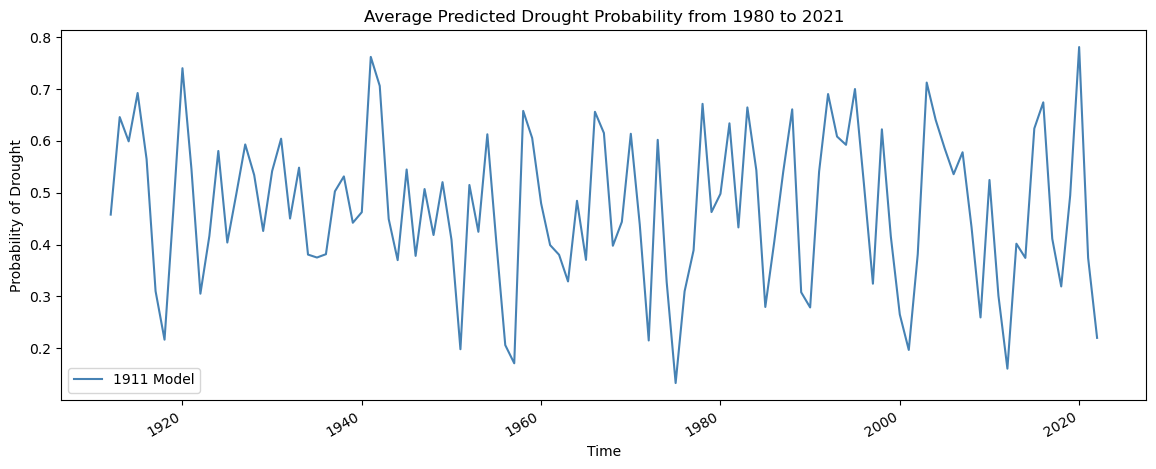

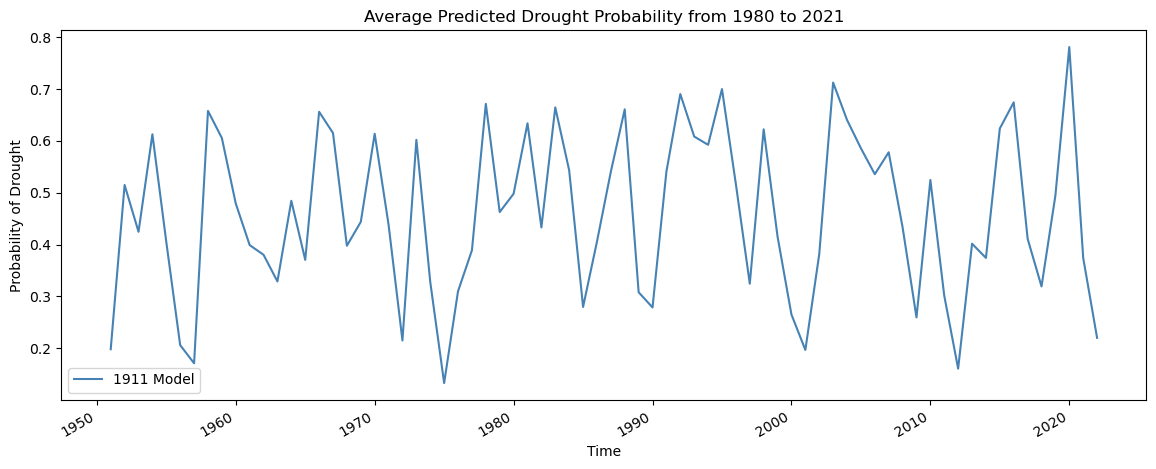

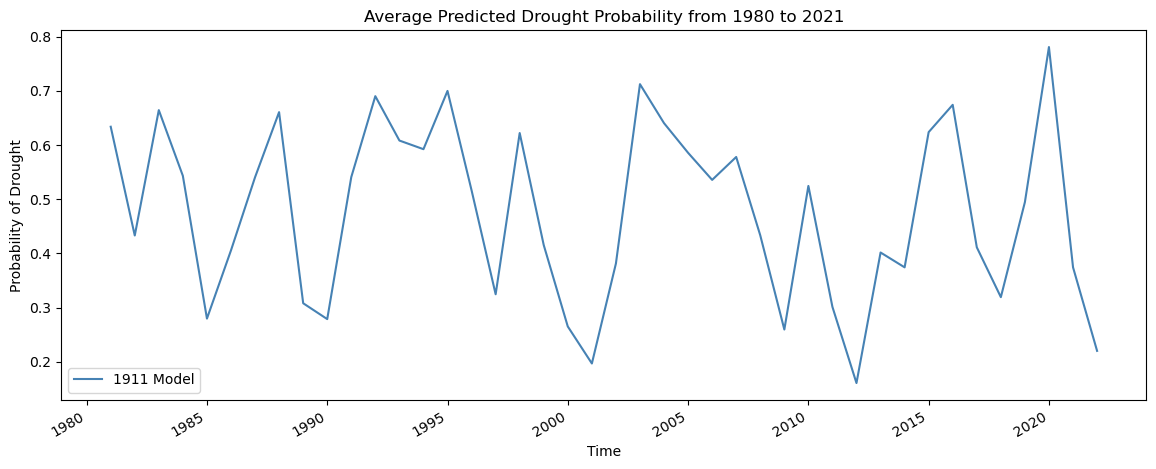

In [33]:
# # This is just initial look - need weighted grid cells to be accurate
# plt.figure(figsize=(14, 4.8))
# # drought_proba_1980.sel(time=slice('1980', '2021')).mean(dim=('lat', 'lon')).plot(label='1980 Model', color='black')
# year_grouped = drought_proba_1911.sel(time=slice('1911', '2021')).resample(time='Y').mean(dim='time')
# year_grouped.mean(dim=('lat', 'lon')).plot(label='1911 Model', color='steelblue')
# plt.legend(loc='lower left')
# plt.title('Average Predicted Drought Probability from 1980 to 2021')
# plt.ylabel('Probability of Drought')
# plt.xlabel('Time')
# # plt.savefig(plotdir + '/timeseries/drought_probability_1980-2022_1911_and_1980_model.png')
# plt.show()
# plt.close()


# plt.figure(figsize=(14, 4.8))
# # drought_proba_1980.sel(time=slice('1980', '2021')).mean(dim=('lat', 'lon')).plot(label='1980 Model', color='black')
# year_grouped = drought_proba_1911.sel(time=slice('1950', '2021')).resample(time='Y').mean(dim='time')
# year_grouped.mean(dim=('lat', 'lon')).plot(label='1911 Model', color='steelblue')
# plt.legend(loc='lower left')
# plt.title('Average Predicted Drought Probability from 1980 to 2021')
# plt.ylabel('Probability of Drought')
# plt.xlabel('Time')
# # plt.savefig(plotdir + '/timeseries/drought_probability_1980-2022_1911_and_1980_model.png')
# plt.show()
# plt.close()


plt.figure(figsize=(14, 4.8))
# drought_proba_1980.sel(time=slice('1980', '2021')).mean(dim=('lat', 'lon')).plot(label='1980 Model', color='black')
year_grouped = drought_proba_1911.sel(time=slice('1980', '2021')).resample(time='Y').mean(dim='time')
year_grouped.mean(dim=('lat', 'lon')).plot(label='1911 Model', color='steelblue')
plt.legend(loc='lower left')
plt.title('Average Predicted Drought Probability from 1980 to 2021')
plt.ylabel('Probability of Drought')
plt.xlabel('Time')
# plt.savefig(plotdir + '/timeseries/drought_probability_1980-2022_1911_and_1980_model.png')
plt.show()
plt.close()

/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

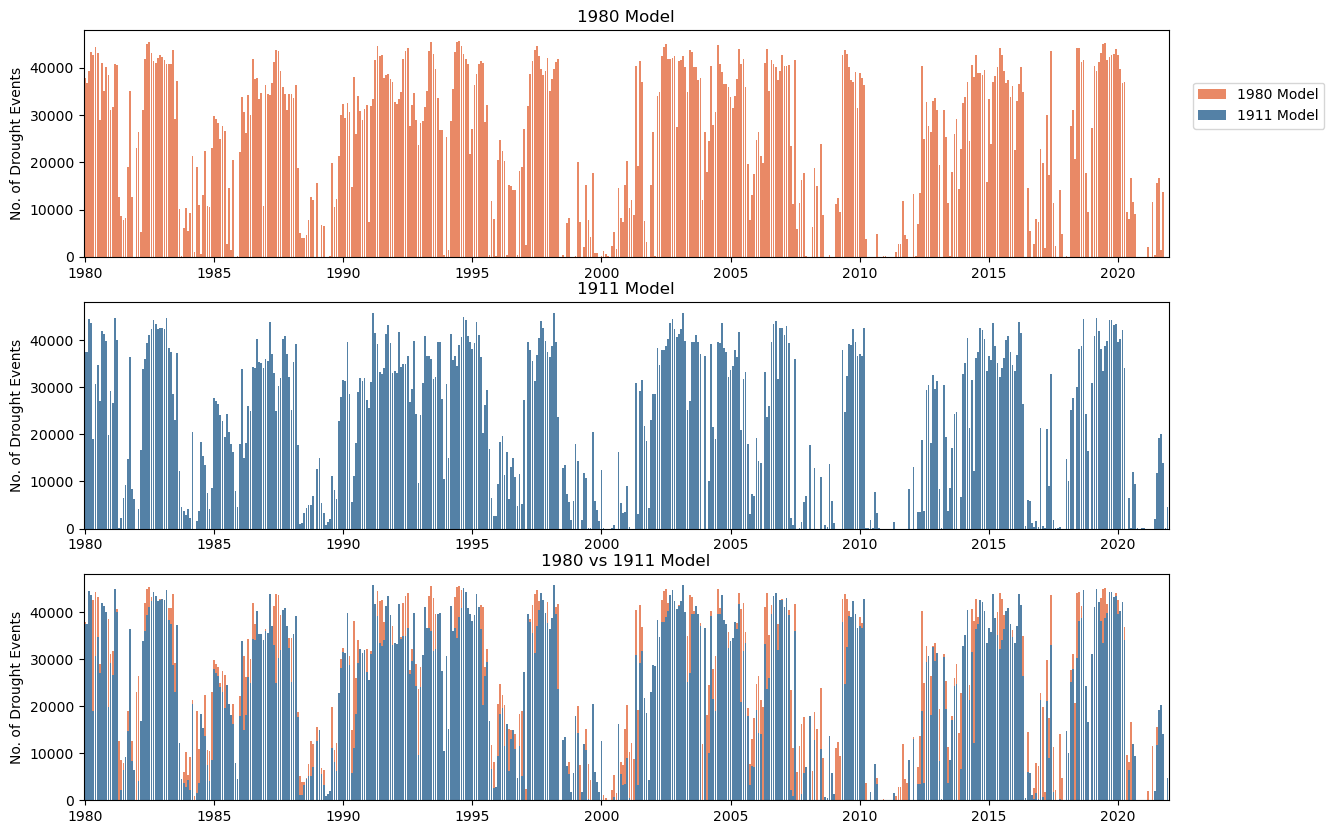

In [ ]:
def set_xticks(data, axis, freq):
    """
    Sets xticks of a plot at the desired frequency (in years).

    Args:
        data (pd.DataFrame): data that is being plotted
        axis (plt.axes): axis that the data is plotted on (e.g. ax1, ax2, ...)
        freq (int): frequency of the xtixks (in years)
    """
    freq = freq * 12
    xticks = axis.get_xticks()
    axis.set_xticks(xticks[::freq])
    axis.set_xticklabels(summed_1980_df.iloc[::freq]["time"].dt.strftime('%Y'))


summed_events_1980 = drought_events_1980.sel(time=slice('1980', '2021')).sum(dim=('lat', 'lon'))
summed_events_1911 = drought_events_1911.sel(time=slice('1980', '2021')).sum(dim=('lat', 'lon'))
summed_1980_df = summed_events_1980.to_dataframe()
summed_1911_df = summed_events_1911.to_dataframe()
summed_1980_df.reset_index(inplace=True)
summed_1911_df.reset_index(inplace=True)

# PLot figure as single subplot
# fig = plt.figure(figsize=(14, 6))
# ax = plt.subplot()
# # print(summed_1980_df.loc[(summed_1980_df['time']>='2015-01') & (summed_1980_df['time']<='2017-12')])
# sns.barplot(summed_1980_df, x='time', y='drought', label='1980 Model', color='coral')
# sns.barplot(summed_1911_df, x='time', y='drought', label='1911 Model', color='steelblue')
# set_xticks(summed_1980_df, ax, 5)
# plt.legend()
# plt.savefig(plotdir + '/timeseries/number_of_drought_events_1980_vs_1911.png', dpi=400)

# .plot(kind='bar', label='1980 Model', color='black')
# .plot(label='1911 Model', color='steelblue')
fig = plt.figure(figsize=(14, 10))
ax1 = plt.subplot(311)
sns.barplot(summed_1980_df, x='time', y='drought', label='1980 Model', color='coral')
set_xticks(summed_1980_df, ax1, 5)
plt.title('1980 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')

ax2 = plt.subplot(312)
sns.barplot(summed_1911_df, x='time', y='drought', label='1911 Model', color='steelblue')
set_xticks(summed_1980_df, ax2, 5)
plt.title('1911 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')

ax3 = plt.subplot(313)
sns.barplot(summed_1980_df, x='time', y='drought', label='1980 Model', color='coral')
sns.barplot(summed_1911_df, x='time', y='drought', label='1911 Model', color='steelblue')
set_xticks(summed_1980_df, ax3, 5)
lgnd = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 3.2))
plt.title('1980 vs 1911 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')


plt.tight_layout()

plt.savefig(plotdir + '/timeseries/drought_events_1911_1980_model_comparison.png', dpi=400)
# set_xticks(summed_1911_df, ax2, 5)

## 1980 vs Long Timeseries Model

## Drought Events per Year

## Millenium and Tinderbox Drought Events

### Spatial Plots of Drought Probability over Events Years/Months

In [ ]:
import math
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import os

datadir = '/g/data/w97/mg5624/RF_project/'
plotdir = '/g/data/w97/mg5624/plots/RF_project/results_analysis/'
scratch = '/scratch/w97/mg5624/plots/RF_project/results_analysis/'

# Number of drought events per year
def create_drought_events_per_year_plots(data, start_year, end_year, model_type, anom=False):
    """
    Creates figure of spatial maps of the droughts per year for each year from start_year to end_year (inclusive).

    Args:
        data (xr.DataArray): dataarray of the drought events, inclusive of the years from start_year to end_year
                             if anom=True this will be in the format of anomaly number of drought events per year
        start_year (int or str): first year of plots
        end_year (int or str): last year to plot
        model_type (str or int): the model that is being plotted (either '1980' or '1911')
    """
    if not anom:
        drought_events_per_year = data.groupby('time.year').sum('time')
    else:
        drought_events_per_year = data
        
    drought_events_per_year_const = drought_events_per_year.sel(year=slice(str(start_year), str(end_year)))
        
    num_plots = len(drought_events_per_year_const['year'].values)
    num_cols = 4
    num_rows = math.ceil(num_plots / num_cols)
    
    plt.figure(figsize=(16, 12), dpi=300)
    
    if anom:
        plt.suptitle('Anomaly of Number of Droughts per Year', fontsize=25)
        cmap = 'BrBG_r'
        vmax = 12
        vmin = -12
        figpath = scratch + f'/spatial_maps/drought_events/{model_type}_model/'
        figname = f'anom_{model_type}_model_droughts_per_year_from_{start_year}_to_{end_year}.png'
    else:
        plt.suptitle('Number of Droughts per Year', fontsize=25)
        cmap = 'OrRd'
        vmax = 12
        vmin = 0
        figpath = scratch + f'/spatial_maps/drought_events/{model_type}_model/'
        figname = f'{model_type}_model_droughts_per_year_from_{start_year}_to_{end_year}.png'
        
    for i in range(num_rows):
        for j in range(num_cols):
            index = (i * num_cols) + j
            if index < num_plots:
                year_drought_map = drought_events_per_year_const.isel(year=index)      
                ax = plt.subplot2grid((num_rows, num_cols), (i, j), projection=ccrs.PlateCarree())
                year = year_drought_map['year'].values
                cbar_sets = {'fraction': 0.04, 'pad': 0.04, 'label': 'No. of Droughts'}
                plot = year_drought_map.plot.pcolormesh(cmap=cmap, vmin=vmin, vmax=vmax, cbar_kwargs=cbar_sets)
                ax.coastlines(resolution='50m')
                plt.title(year, fontsize=18)
    plt.tight_layout()
      
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    
    plt.savefig(figpath + figname)
    plt.close()

start_years = [1980, 1990, 2000, 2010]
end_years = [1989, 1999, 2009, 2022]

# for i, start_year in enumerate(start_years):
#     end_year = end_years[i]
#     create_drought_events_per_year_plots(drought_events_1980, start_year, end_year, '1980')
#     create_drought_events_per_year_plots(drought_events_1911, start_year, end_year, '1911')

In [ ]:
def create_yearly_drought_proba_plots(data, start_year, end_year, model_type, metric, anom=False):
    """
    Creates figure of spatial maps of the average droughts probability for each year from start_year to end_year (inclusive).

    Args:
        data (xr.DataArray): dataarray of the drought probability, inclusive of the years from start_year to end_year
        start_year (int or str): first year of plots
        end_year (int or str): last year to plot
        model_type (str or int): the model that is being plotted (either '1980' or '1911')
        metric (str): metric of the drought probability (e.g. 'mean', 'max')
    """
    if metric == 'mean':
        yearly_drought_proba = data.groupby('time.year').mean('time')
    elif metric == 'max':
        yearly_drought_proba = data.groupby('time.year').max('time')
    elif metric == 'min':
        yearly_drought_proba = data.groupby('time.year').min('time')
        
    drought_proba_const = yearly_drought_proba.sel(year=slice(str(start_year), str(end_year)))
    num_plots = len(drought_proba_const['year'].values)
    num_cols = 4
    num_rows = math.ceil(num_plots / num_cols)
    
    plt.figure(figsize=(16, 12), dpi=300)
    

    if anom:
        plt.suptitle(f'{metric[0].upper() + metric[1:]} Drought Probability Anomaly for the {model_type} model', fontsize=25)
        cmap = 'BrBG_r'
        vmax = 0.5
        vmin=-0.5
        extend = 'both'
        figpath = scratch + f'/spatial_maps/drought_proba/{model_type}_model/{metric}/'
        figname = f'anom_{model_type}_{metric}_drought_proba_from_{start_year}_to_{end_year}.png'
    else:
        plt.suptitle(f'{metric[0].upper() + metric[1:]} Drought Probability', fontsize=25)
        cmap = 'Reds'
        vmax=1
        vmin=0
        extend = 'neither'
        figpath = scratch + f'/spatial_maps/drought_proba/{model_type}_model/{metric}/'
        figname = f'{model_type}_{metric}_drought_proba_from_{start_year}_to_{end_year}.png'
        
    for i in range(num_rows):
        for j in range(num_cols):
            index = (i * num_cols) + j
            if index < num_plots:
                year_drought_map = drought_proba_const.isel(year=index)      
                ax = plt.subplot2grid((num_rows, num_cols), (i, j), projection=ccrs.PlateCarree())
                year = year_drought_map['year'].values
                cbar_sets = {'fraction': 0.04, 'pad': 0.04, 'label': 'Probability of Drought', 'extend': extend}
                plot = year_drought_map.plot.pcolormesh(cmap=cmap, vmin=vmin, vmax=vmax, cbar_kwargs=cbar_sets)
                ax.coastlines(resolution='50m')
                plt.title(year, fontsize=18)
    plt.tight_layout()
    
    
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    
    plt.savefig(figpath + figname)
    plt.close()

METRICS = ['mean', 'max', 'min']
# for i, start_year in enumerate(start_years):
#     for metric in METRICS:
#         end_year = end_years[i]
#         create_yearly_drought_proba_plots(drought_proba_1980, start_year, end_year, '1980', metric)
#         create_yearly_drought_proba_plots(drought_proba_1911, start_year, end_year, '1911', metric)

In [ ]:
def create_anomaly_from_mean_proba(drought_proba_data):
    """
    Creates dataarray of the anomaly from the mean probability of drought over the dataset.

    Args:
        drought_proba_data (xr.DataArray): drought probability data over the whole timeseries
    
    Returns:
        anom_drought_proba (xr.DataArray): anomaly from mean probability of drought data
    """
    mean_drought_proba = drought_proba_data.mean(dim='time')
    anom_drought_proba = drought_proba_data - mean_drought_proba

    return anom_drought_proba


def create_anomaly_from_yearly_drought_events(drought_events_data):
    """
    Creates dataarray of the anomaly from mean of drought events per year.

    Args:
        drought_events_data (xr.DataArray): drought events data

    Returns:
        anom_drought_events (xr.DataArray): anomaly from the mean drought events per year
    """
    drought_events_per_year = drought_events_data.groupby('time.year').sum(dim='time')
    mean_drought_events_per_year = drought_events_per_year.mean('year')
    anom_drought_events_per_year = drought_events_per_year - mean_drought_events_per_year

    return anom_drought_events_per_year


# anom_proba_1980 = create_anomaly_from_mean_proba(drought_proba_1980)
# anom_events_1980 = create_anomaly_from_yearly_drought_events(drought_events_1980)
# anom_proba_1911 = create_anomaly_from_mean_proba(drought_proba_1911)
# anom_events_1911 = create_anomaly_from_yearly_drought_events(drought_events_1911)

In [ ]:
def create_monthly_drought_proba_maps_for_specified_year(data, year, model_type, drought_measure):
    """
    Creates a spatial map of drought probability anomaly or drought events from mean for each month in the specified year.

    Args:
        data (xr.DataArray): drought probability anomaly from mean
        year (int): year of interest
        model_type (str): the model to plot ('1911' or '1980' model)
        drought_measure (str): which measure of drought to plot: 'Probability Anomaly' or 'Events'
        
    """
    year_data = data.sel(time=slice(str(year - 1) + '-12', str(year) + '-11'))
    num_rows = 4
    num_cols = 3

    plt.figure(figsize=(16, 16), dpi=300)
    plot_dict = {
        'Probability Anomaly': {
            'vmin': -0.7, 
            'vmax': 0.7,
            'cmap': 'BrBG_r',
            'extend': 'both'
        },
        'Event': {
            'vmin': 0, 
            'vmax': 1,
            'cmap': matplotlib.colors.ListedColormap(['white', 'red']),
            'extend': 'neither'
        }
    }
    vmin = plot_dict[drought_measure]['vmin']
    vmax = plot_dict[drought_measure]['vmax']
    cmap = plot_dict[drought_measure]['cmap']
    extend = plot_dict[drought_measure]['extend']
    
    months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov']
    plt.suptitle(f'Drought {drought_measure} for the {model_type} Model', fontsize=25)
    for i in range(num_rows):
        for j in range(num_cols):
            index = (i * num_cols) + j
            month_drought_map = year_data.isel(time=index)
            ax = plt.subplot2grid((num_rows, num_cols), (i, j), projection=ccrs.PlateCarree())
            year = month_drought_map['time.year'].values
            month = months[index]
            cbar_sets = {'fraction': 0.04, 'pad': 0.04, 'label': f'Drought {drought_measure}', 'extend': extend}
            plot = month_drought_map.plot.pcolormesh(cmap=cmap, vmin=vmin, vmax=vmax, cbar_kwargs=cbar_sets)
            ax.coastlines(resolution='50m')
            plt.title(f'{month} {year}', fontsize=18)
    plt.tight_layout()

    tinderbox_years = range(2015, 2021)
    millenium_years = range(1998, 2011)

    if year in tinderbox_years:
        year_cat_path = 'tinderbox_years'
    elif year in millenium_years:
        year_cat_path = 'millenium_years'
    else:
        year_cat_path = 'other_years'

    measure_filepath = {
        'Probability Anomaly': 'drought_proba',
        'Event': 'drought_events'
    }
    
    figpath = scratch + f'/spatial_maps/{measure_filepath[drought_measure]}/{model_type}_model/monthly/{year_cat_path}/'
    figname = f'{model_type}_{measure_filepath[drought_measure]}_for_{year}.png'

    if not os.path.exists(figpath):
        os.makedirs(figpath)

    plt.savefig(figpath + figname)
    plt.close()

# years_of_interest = list(range(1998, 2011)) + list(range(2015, 2021))
# drought_measures = ['Event', 'Probability Anomaly']
# models = ['1980', '1911']
# data = {
#     'Event': {'1980': drought_events_1980, '1911': drought_events_1911},
#     'Probability Anomaly': {'1980': anom_proba_1980, '1911': anom_proba_1911},
# }

# for year in years_of_interest:
#     for measure in drought_measures:
#         for model in models:
#             create_monthly_drought_proba_maps_for_specified_year(data[measure][model], year, model, measure)



In [ ]:
known_droughts_years = {
    '1914-15': list(range(1912, 1917)),
    'WWII': list(range(1935, 1948)),
    '1965-68': list(range(1963, 1970)),
    '1982-83': list(range(1981, 1985)),
    'millenium': list(range(1998, 2011)),
    'tinderbox': list(range(2015, 2021)),
}

year = 1920
for category, year_range in known_droughts_years.items():
    if year in year_range:
        drought_event = category
        break
    else:
        drought_event = 'other_years'

print(drought_event)

other_years


In [ ]:
# print(anom_events_1980)
# create_drought_events_per_year_plots(anom_events_1980, 1998, 2010, '1980', anom=True)
# create_yearly_drought_proba_plots(anom_proba_1980, 1998, 2010, '1980', 'mean', anom=True)


# create_drought_events_per_year_plots(anom_events_1911, 1998, 2010, '1911', anom=True)
# create_yearly_drought_proba_plots(anom_proba_1911, 1998, 2010, '1911', 'mean', anom=True)

# create_drought_events_per_year_plots(anom_events_1980, 1980, 2021, '1980', anom=True)
# create_yearly_drought_proba_plots(anom_proba_1980, 1980, 2021, '1980', 'mean', anom=True)


# create_drought_events_per_year_plots(anom_events_1911, 1911, 2021, '1911', anom=True)
# create_yearly_drought_proba_plots(anom_proba_1980, 2010, 2020, '1980', 'mean', anom=True)


In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



datadir = '/g/data/w97/mg5624/RF_project/'
predictors_data_filepath = datadir + f'/predictors_data/test_model/'
predictors_data_filename = f'predictors_dataframe_1981-1983_SE_australia.csv'
predictors_data = pd.read_csv(predictors_data_filepath + predictors_data_filename)

print(predictors_data)
training_data = pd.read_csv(datadir + '/training_data/training_data.csv')
training_data.dropna(axis=0, inplace=True)


# predictors = [
#     'Acc_12-Month_Precipitation', 'Mean_12-Month_Runoff', 'ENSO_index', 'IOD_index', 
#     'SAM_index', 'Mean_12-Month_ET', 'Mean_12-Month_PET', 'Mean_12-Month_SMsurf', 'Mean_12-Month_SMroot', 
#     'Sin_month', 'Cos_month'
# ]

# target = 'Drought'

# X_train = training_data[predictors]
# y = training_data[target]


# # Create and train the Random Forest model
# clf = RandomForestClassifier(n_estimators=500, random_state=42)
# clf.fit(X_train, y)

# X_pred = predictors_data[predictors]

# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_pred)

# print(shap_values)
# print('ran')


time = '1980'

: 

## Drought Trends

## MK Trend Test on Drought Proba and Drought Events per Year

In [ ]:
# Before performing MK Trendtests - we must first test for autocorrelation
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

test = drought_proba_1980.sel(lat=-33, lon=150, method='nearest')
test_df = test.to_dataframe()
test_df.reset_index(inplace=True)
name = drought_proba_1980.name
print(test_df)
model = ols(f'{name} ~ time', data=test_df).fit()
DW = durbin_watson(model.resid)
print(DW)

DW_df = drought_proba_1980.isel(time=0).to_dataframe().copy()
DW_df.reset_index(inplace=True)
DW_df.drop(['time', name], axis=1, inplace=True)
print(DW_df)

          time   lat    lon  drought_proba
0   1980-01-01 -33.0  150.0          0.576
1   1980-02-01 -33.0  150.0          0.494
2   1980-03-01 -33.0  150.0          0.660
3   1980-04-01 -33.0  150.0          0.830
4   1980-05-01 -33.0  150.0          0.690
..         ...   ...    ...            ...
499 2021-08-01 -33.0  150.0          0.110
500 2021-09-01 -33.0  150.0          0.122
501 2021-10-01 -33.0  150.0          0.106
502 2021-11-01 -33.0  150.0          0.008
503 2021-12-01 -33.0  150.0          0.040

[504 rows x 4 columns]
3.0950004461958835
        lat     lon
0     -40.0  139.00
1     -40.0  139.05
2     -40.0  139.10
3     -40.0  139.15
4     -40.0  139.20
...     ...     ...
61105 -29.0  153.30
61106 -29.0  153.35
61107 -29.0  153.40
61108 -29.0  153.45
61109 -29.0  153.50

[61110 rows x 2 columns]


In [ ]:
def calculate_DW_score(data, DW_upper_bound=2.5, DW_lower_bound=1.5):
    """
    Calculates the DW score for each grid point of the input data.

    Args:
        data (xr.DataArray): spatial and temporal dataarray
        DW_upper_bound (float): upper bound for DW null hypothesis to be satisfied (default=2.5)
        DW_lower_bound (float): lower bound for DW null hypothesis to be satisfied (default=1.5)

    Returns:
        DW_array (pd.DataFrame): dataframe containing DW score and indication if null hypothesis 
                                 satisfied or not (1=+ve corr, 0=no corr, -1=-ve corr) 
    """
    data_name = data.name
    DW_df = pd.DataFrame()
    for i in data['lat'].values:
        for j in data['lon'].values:
            data_ij = data.sel(lat=i, lon=j)
            data_ij_df = data_ij.to_dataframe()
            data_ij_df.reset_index(inplace=True)

            # if all values are nan, then skip this grid point
            if data_ij_df[data_name].isnull().values.all():
                break
                
            model = ols(f'{data_name} ~ time', data=data_ij_df).fit()
            DW_score = durbin_watson(model.resid)

            if DW_score < DW_lower_bound:
                DW_hyp = 1
            elif DW_score > DW_upper_bound:
                DW_hyp = -1
            else:
                DW_hyp = 0
                
            DW_dict = {'lat': i, 'lon': j, 'DW_score': DW_score, 'DW_hyp': DW_hyp}
            DW_df_ij = pd.DataFrame([DW_dict])
            DW_df = pd.concat((DW_df, DW_df_ij))
            # print(DW_df)

    return DW_df

# DW_df = calculate_DW_score(drought_proba_1980)
# print(DW_df)

def create_events_per_year_data(drought_events_data):
    """
    Finds the number of drought events per year for each grid cell.

    Args:
        drought_events_data (xr.DataArray): drought event data (monthly timescale)

    Returns:
        drought_events_per_year (xr.DataArray): number of events per year
    """
    drought_events_per_year = drought_events_data.groupby('time.year').sum(dim='time')
    drought_events_per_year = drought_events_per_year.rename({'year': 'time'})

    return drought_events_per_year

year = create_events_per_year_data(drought_events_1980)
print(year)

<xarray.DataArray 'drought' (time: 42, lat: 210, lon: 291)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [12., 12., 12., ...,  0.,  0.,  0.],
        [12., 12., 12., ...,  0.,  0.,  0.],
        [12., 12., 12., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [11., 11., 11., ...,  0.,  0.,  0.],
        [11., 11., 11., ...,  0.,  0.,  0.],
        [11., 11., 11., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [12., 12., 12., ...,  3.,  3.,  0.],
        [12., 12., 12., ...,  3.,  3.,  0.],
        [12., 12., 12., ...,  3.,  3.,  3.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,

In [ ]:
import time

def calculate_DW_score(data, DW_upper_bound=2.5, DW_lower_bound=1.5):
    """
    Calculates the DW score for each grid point of the input data.

    Args:
        data (xr.DataArray): spatial and temporal dataarray
        DW_upper_bound (float): upper bound for DW null hypothesis to be satisfied (default=2.5)
        DW_lower_bound (float): lower bound for DW null hypothesis to be satisfied (default=1.5)

    Returns:
        DW_array (pd.DataFrame): dataframe containing DW score and indication if null hypothesis 
                                 satisfied or not (1=+ve corr, 0=no corr, -1=-ve corr) 
    """
    data_name = data.name
    DW_df = pd.DataFrame()

    # Flatten the data array to simplify operations
    data_df = data.to_dataframe().reset_index()
    data_df['latlon'] = data_df.apply(lambda row: (row['lat'], row['lon']), axis=1)
    
    # Group by latlon and perform the DW calculations
    group_data = data_df.groupby("latlon")
    DW_scores = group_data.apply(lambda group: calculate_DW_group(group, data_name, DW_upper_bound, DW_lower_bound))
    
    DW_df = DW_scores.reset_index()

    DW_df.drop('latlon', axis=1, inplace=True)
    return DW_df

def calculate_DW_group(group, data_name, DW_upper_bound, DW_lower_bound):
    lat, lon = group["lat"].iloc[0], group["lon"].iloc[0]

    # if all values are nan, then skip this grid point
    if group[data_name].isnull().all():
        return pd.Series({"lat": lat, "lon": lon, "DW_score": np.nan, "DW_hyp": np.nan})

    model = ols(f'{data_name} ~ time', data=group).fit()
    DW_score = durbin_watson(model.resid)

    if DW_score < DW_lower_bound:
        DW_hyp = 1
    elif DW_score > DW_upper_bound:
        DW_hyp = -1
    else:
        DW_hyp = 0

    return pd.Series({"lat": lat, "lon": lon, "DW_score": DW_score, "DW_hyp": DW_hyp})
    
print(drought_proba_1980)
test = drought_proba_1980.sel(time=slice('1980-01', '1980-05'), lat=slice(-33, -31), lon=slice(150, 152))

start_time = time.time()
DW_df = calculate_DW_score(test)
print('loops:', time.time() - start_time)
print(DW_df)
start_time = time.time()
DW_df_vect = calculate_DW_score_vect(test)
print('vectoraised:', time.time() - start_time)
print(DW_df_vect)

print(DW_df['DW_score'] - DW_df_vect['DW_score'])

<xarray.DataArray 'drought_proba' (time: 504, lat: 210, lon: 291)>
[30799440 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
  * lat      (lat) float64 -40.0 -39.95 -39.9 -39.85 ... -29.1 -29.05 -29.0
  * lon      (lon) float64 139.0 139.1 139.1 139.2 ... 153.3 153.4 153.4 153.5
loops: 6.31831955909729
       lat     lon  DW_score  DW_hyp
0    -33.0  150.00  0.312500     1.0
1    -33.0  150.05  0.312500     1.0
2    -33.0  150.10  0.312500     1.0
3    -33.0  150.15  0.166667     1.0
4    -33.0  150.20  0.368421     1.0
...    ...     ...       ...     ...
1676 -31.0  151.80  0.060976     1.0
1677 -31.0  151.85  0.063830     1.0
1678 -31.0  151.90  0.060976     1.0
1679 -31.0  151.95  0.157143     1.0
1680 -31.0  152.00  0.258621     1.0

[1681 rows x 4 columns]


NameError: name 'calculate_DW_score_vect' is not defined

In [ ]:
# Now we can compute the MK trendtest

import pymannkendall as mk
# mk_test = mk.original_test(test_df['drought_proba'].values)
# print(mk_test)

# mk_test_hr = mk.hamed_rao_modification_test(test_df['drought_proba'].values)
# print(mk_test_hr)

In [ ]:
def find_MK_trendtest(data):
    """
    Computes the MK trendtest for each grid point in the data.

    Args:
        data (xr.DataArray): spatial and temporal data

    Returns:
        MK_data (pd.DataFrame): trend test result at each grid point
    """
    print('started')
    data_name = data.name
    MK_df = pd.DataFrame()
    for i in data['lat'].values:
        for j in data['lon'].values:
            data_ij = data.sel(lat=i, lon=j)
            data_ij_df = data_ij.to_dataframe()
            data_ij_df.reset_index(inplace=True)

            # if all values are nan, then skip this grid point
            if data_ij_df[data_name].isnull().values.all():
                break
                
            MK_result = mk.original_test(data_ij_df[data_name].values)

            MK_dict = {'lat': i, 'lon': j, 'MK_trend': MK_result.trend, 'MK_slope': MK_result.slope}
            MK_df_ij = pd.DataFrame([MK_dict])
            MK_df = pd.concat((MK_df, MK_df_ij))

    return MK_df

# MK = find_MK_trendtest(drought_proba_1980)

In [ ]:
def find_MK_trendtest_vect(data, test_type):
    """
    Computes the MK trendtest for each grid point in the data.

    Args:
        data (xr.DataArray): spatial and temporal data

    Returns:
        MK_data (pd.DataFrame): trend test result at each grid point
    """
    print('MK')
    data_name = data.name
    MK_df = pd.DataFrame()

    lat_values = data['lat'].values
    lon_values = data['lon'].values

    # lat, lon = np.meshgrid(lat_values, lon_values)
    # lat = lat.flatten()
    # lon = lon.flatten()

    data_df = data.to_dataframe().reset_index()

    valid_data = ~data_df[data_name].isnull().values
    print(valid_data.shape)
    lat = lat[valid_data]
    lon = lon[valid_data]

    if test_type == 'original':
        MK_results = np.array([mk.original_test(data_df[data_name][valid_data].values) for _ in range(len(lat))])
    elif test_type == 'hamed_rao':
        MK_results = np.array([mk.hamed_rao_modification_test(data_df[data_name][valid_data].values) for _ in range(len(lat))])

    MK_df['lat'] = lat
    MK_df['lon'] = lon
    MK_df['MK_trend'] = MK_results[:, 0]
    MK_df['MK_slope'] = MK_results[:, 1]

    return MK_df



test = drought_proba_1980.sel(time=slice('1980-01', '1980-05'), lat=slice(-33, -31), lon=slice(150, 152))

# start_time = time.time()
# MK_df = find_MK_trendtest(test)
# print('loops:', time.time() - start_time)
# print(MK_df)
start_time = time.time()
MK_df_vect = find_MK_trendtest_vect(test, 'original')
print('vectorised:', time.time() - start_time)
print(MK_df_vect)

print(MK_df['DW_score'] - MK_df_vect['DW_score'])

## Plot MK and DW Test Results

In [ ]:
filepath = datadir + 'DW_test/drought_events/1980_model/DW_test_drought_events_1980_model.csv'

DW = pd.read_csv(filepath)
print(DW['lat'].values)

[-35.65 -35.65 -35.65 ... -29.   -29.   -29.  ]


In [ ]:
MK_filepath = datadir + 'MK_test/drought_proba/1911_model/'
original_filename = 'MK_test_drought_proba_1911_model.csv'

MK_orig_df = pd.read_csv(MK_filepath + original_filename)


# MK_orig_df.loc[MK_orig_df['MK_trend'] == 'no trend', 'MK_slope'] = 0
map = {'no trend': 0, 'decreasing':-1, 'increasing': 1}
MK_orig_df['MK_trend'] = MK_orig_df['MK_trend'].map(map)

MK_orig_df.drop('Unnamed: 0', axis=1, inplace=True)
MK_orig_df.set_index(['lat', 'lon'], inplace=True)
MK_orig_data = MK_orig_df.to_xarray()
# MK_orig_data.plot()
print(MK_orig_data)

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/w97/mg5624/RF_project/MK_test/drought_proba/1911_model/MK_test_drought_proba_1911_model.csv'

AttributeError: 'Axes' object has no attribute 'coastlines'

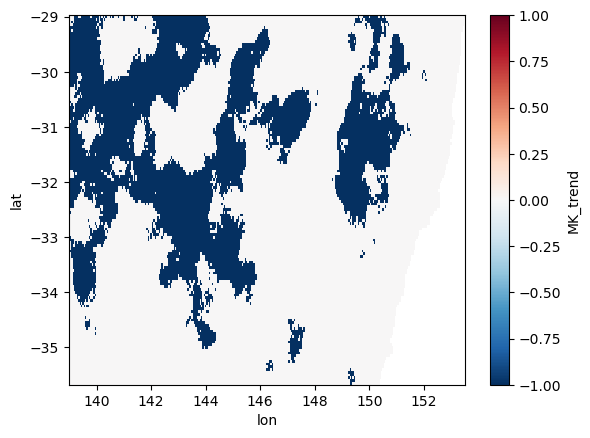

In [ ]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

slope_data = MK_orig_data.MK_slope
trend_data = MK_orig_data.MK_trend
ax = plt.subplot()
trend_data.plot()
ax.coastlines(resolution='50m')

In [ ]:
def find_MK_trendtest(data, test_type):
    """
    Computes the MK trendtest for each grid point in the data.

    Args:
        data (xr.DataArray): spatial and temporal data

    Returns:
        MK_data (pd.DataFrame): trend test result at each grid point
    """
    print('MK')
    data_name = data.name
    MK_df = pd.DataFrame()
    for i in data['lat'].values:
        for j in data['lon'].values:
            data_ij = data.sel(lat=i, lon=j)
            data_ij_df = data_ij.to_dataframe()
            data_ij_df.reset_index(inplace=True)

            # if all values are nan, then skip this grid point
            if data_ij_df[data_name].isnull().values.all():
                MK_dict = {'lat': i, 'lon': j, 'MK_trend': np.nan, 'MK_slope': np.nan}
                # break
            else:
                if test_type == 'original':
                    MK_result = mk.original_test(data_ij_df[data_name].values)
                elif test_type == 'hamed_rao':
                    MK_result = mk.hamed_rao_modification_test(data_ij_df[data_name].values)
    
                MK_dict = {'lat': i, 'lon': j, 'MK_trend': MK_result.trend, 'MK_slope': MK_result.slope}
                
            MK_df_ij = pd.DataFrame([MK_dict])
            MK_df = pd.concat((MK_df, MK_df_ij))

    return MK_df

test = drought_proba_1980.sel(time=slice('1980-01', '1980-05'), lat=slice(-38, -36), lon=slice(144, 145))
print(test)
test_MK = find_MK_trendtest(test, 'original')
# drought_proba_1980.isel(time=0).plot()

# test_MK

<xarray.DataArray 'drought_proba' (time: 5, lat: 41, lon: 21)>
[4305 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1980-05-01
  * lat      (lat) float64 -38.0 -37.95 -37.9 -37.85 ... -36.1 -36.05 -36.0
  * lon      (lon) float64 144.0 144.1 144.1 144.2 ... 144.8 144.9 144.9 145.0
MK


In [ ]:
print(test_MK.loc[test_MK['lon'] == 144.55])

     lat     lon    MK_trend  MK_slope
0 -38.00  144.55         NaN       NaN
0 -37.95  144.55    no trend -0.001333
0 -37.90  144.55    no trend  0.001000
0 -37.85  144.55    no trend  0.010000
0 -37.80  144.55    no trend  0.008000
0 -37.75  144.55    no trend -0.003000
0 -37.70  144.55    no trend -0.004667
0 -37.65  144.55    no trend -0.007000
0 -37.60  144.55    no trend  0.017500
0 -37.55  144.55    no trend  0.023750
0 -37.50  144.55    no trend  0.034500
0 -37.45  144.55    no trend  0.033667
0 -37.40  144.55    no trend  0.069500
0 -37.35  144.55  increasing  0.062167
0 -37.30  144.55  increasing  0.074250
0 -37.25  144.55    no trend  0.061500
0 -37.20  144.55    no trend  0.055250
0 -37.15  144.55    no trend  0.050500
0 -37.10  144.55    no trend  0.038750
0 -37.05  144.55    no trend  0.020500
0 -37.00  144.55    no trend  0.037250
0 -36.95  144.55    no trend  0.021500
0 -36.90  144.55    no trend  0.019500
0 -36.85  144.55    no trend  0.012000
0 -36.80  144.55    no tr

/g/data/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2162: UserWarning: The following kwargs were not used by contour: 'where'
  primitive = ax.contourf(x, y, z, **kwargs)


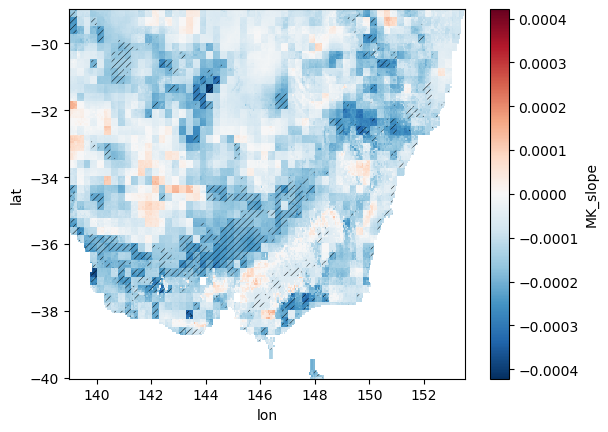

In [26]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl



MK_df = pd.read_csv('/g/data/w97/mg5624/RF_project/MK_test/drought_proba/1980_model/hamed_rao_MK_test_drought_proba_1980_model.csv')
# trend = MK_df[['lat', 'lon', 'MK_trend']]
# change trend to 0, 1, -1, then apply as hatching mask to slope
MK_df['MK_trend'].replace({'no trend': 0, 'decreasing': -1, 'increasing': 1}, inplace=True)
MK_df.set_index(['lat', 'lon'], inplace=True)
MK_da = MK_df.to_xarray()
trend = MK_da.MK_trend
slope = MK_da.MK_slope
significant = trend != 0
trend_masked = trend.where(significant)
# hatch_condition = trend != 0 
# mask the array so that 0 is masked out, then plot with hatching - remove colorbar!
plt.figure()
slope.plot()
trend_masked.plot.contourf(hatches=[5*'/'], colors='none', levels=(0.5, 1), where=(trend==1), add_colorbar=False)
mpl.rcParams['hatch.linewidth'] = 0.35
# mpl.rcParams['hatch.density'] = 10
plt.show()
plt.close()

In [15]:
ds = xr.open_dataset('/g/data/w97/mg5624/RF_project/drought_prediction/1911_model/drought_prediction_dataset_1911_model.nc')
da = ds.drought_proba
print(da)
START_YEARS = {
    '1911': ['1911', '1950', '1980'],
    '1980': ['1980']
}

for year in START_YEARS['1911']:
    print(year)
    print(da.sel(time=slice(year,None)))
    

<xarray.DataArray 'drought_proba' (time: 1332, lat: 213, lon: 291)>
[82561356 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1911-01-01 1911-02-01 ... 2021-12-01
  * lat      (lat) float64 -40.0 -39.95 -39.9 -39.85 ... -29.1 -29.05 -29.0
  * lon      (lon) float64 139.0 139.1 139.1 139.2 ... 153.3 153.4 153.4 153.5
1911
<xarray.DataArray 'drought_proba' (time: 1332, lat: 213, lon: 291)>
[82561356 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1911-01-01 1911-02-01 ... 2021-12-01
  * lat      (lat) float64 -40.0 -39.95 -39.9 -39.85 ... -29.1 -29.05 -29.0
  * lon      (lon) float64 139.0 139.1 139.1 139.2 ... 153.3 153.4 153.4 153.5
1950
<xarray.DataArray 'drought_proba' (time: 864, lat: 213, lon: 291)>
[53553312 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
  * lat      (lat) float64 -40.0 -39.95 -39.9 -39.85 ... -29.1 -29.05 -29.0
  * lon      (lon) float64 139.0 13

In [16]:
import xarray as xr
ds = xr.open_dataset('/g/data/w97/mg5624/RF_project/drought_prediction/1911_model/drought_prediction_dataset_1911_model.nc')


proba = ds.drought_proba
years = list(set(proba['time.year'].values.tolist()))

for year in years:
    year_data = proba.sel(time=slice(f'{year}-01-01', f'{year}-12-01')).mean(dim=['lat', 'lon'])
    year_data.time = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

<xarray.DataArray 'drought_proba' (time: 12)>
array([0.37251387, 0.29274917, 0.23433142, 0.19370128, 0.25230355,
       0.37070409, 0.50387506, 0.59685582, 0.73494154, 0.75249769,
       0.66854558, 0.52041671])
Coordinates:
  * time     (time) datetime64[ns] 1911-01-01 1911-02-01 ... 1911-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.63944303, 0.71816101, 0.83364964, 0.77920212, 0.78415044,
       0.51607666, 0.61719949, 0.60680556, 0.6760947 , 0.67272876,
       0.41680996, 0.48968631])
Coordinates:
  * time     (time) datetime64[ns] 1912-01-01 1912-02-01 ... 1912-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.59269058, 0.69753031, 0.72226662, 0.25718068, 0.47392532,
       0.4964904 , 0.57005263, 0.64549648, 0.71573472, 0.65213038,
       0.71840351, 0.64654554])
Coordinates:
  * time     (time) datetime64[ns] 1913-01-01 1913-02-01 ... 1913-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.72450593, 0.71134173, 0.48952979, 0.72098162, 0.680459

<xarray.DataArray 'drought_proba' (time: 12)>
array([0.47577441, 0.59240274, 0.47413279, 0.68743194, 0.20357979,
       0.35213215, 0.6029179 , 0.50138712, 0.74233129, 0.66187597,
       0.6283869 , 0.45490638])
Coordinates:
  * time     (time) datetime64[ns] 1937-01-01 1937-02-01 ... 1937-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.53479447, 0.55065879, 0.74679378, 0.54379516, 0.27734242,
       0.36044294, 0.41079141, 0.40888977, 0.41201941, 0.3187197 ,
       0.35169809, 0.38886246])
Coordinates:
  * time     (time) datetime64[ns] 1938-01-01 1938-02-01 ... 1938-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.57946434, 0.24455632, 0.22309936, 0.22265986, 0.33144061,
       0.45387238, 0.42644795, 0.61755063, 0.73564688, 0.62022822,
       0.62209297, 0.47210893])
Coordinates:
  * time     (time) datetime64[ns] 1939-01-01 1939-02-01 ... 1939-12-01
<xarray.DataArray 'drought_proba' (time: 12)>
array([0.65252906, 0.76806894, 0.82426554, 0.71102002, 0.709195

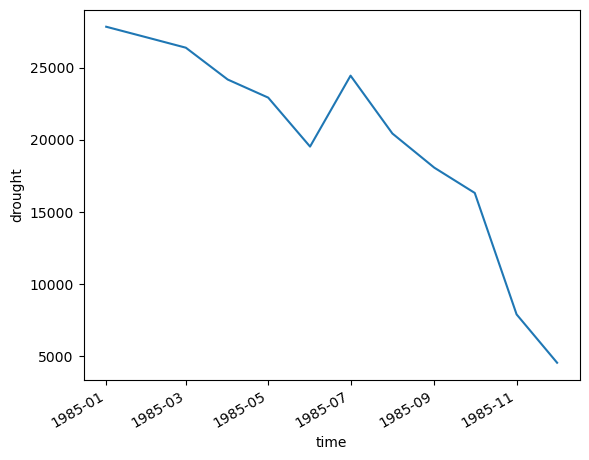

In [5]:
events = ds.drought
events.sel(time=slice('1985-01-01', '1985-12-01')).sum(dim=['lat', 'lon']).plot()